In [1]:
# Findings in ../README.md

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
file_one = "data/mouse_drug_data.csv"
file_two = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
file_one_pd = pd.read_csv(file_one)
file_two_pd = pd.read_csv(file_two)

# Combine the data into a single dataset
mouse_id_merged_pd = pd.merge(file_one_pd, file_two_pd, on="Mouse ID")

# Display the data table for preview
mouse_id_merged_pd.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
MEAN_Tumor_Volumen_pd = mouse_id_merged_pd.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
Tumor_Volumen_Mean = MEAN_Tumor_Volumen_pd["Tumor Volume (mm3)"].mean()
Tumor_response_Mean_pd = pd.DataFrame(Tumor_Volumen_Mean).reset_index()

# Preview DataFrame
Tumor_response_Mean_pd.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
STDERR_Tumor_Volumen_pd = mouse_id_merged_pd.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
Tumor_Volumen_StdERR = STDERR_Tumor_Volumen_pd["Tumor Volume (mm3)"].sem()
Tumor_response_StdERR_pd = pd.DataFrame(Tumor_Volumen_StdERR).reset_index()

# Preview DataFrame
Tumor_response_StdERR_pd.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
Tumor_response_Mean = Tumor_response_Mean_pd.pivot(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)') 
Tumor_response_StdERR = Tumor_response_StdERR_pd.pivot(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked
Tumor_response_Mean


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


No handles with labels found to put in legend.


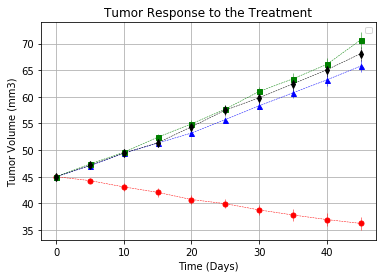

In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(Tumor_response_Mean.index, Tumor_response_Mean["Capomulin"], yerr=Tumor_response_StdERR["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Tumor_response_Mean.index, Tumor_response_Mean["Infubinol"], yerr=Tumor_response_StdERR["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Tumor_response_Mean.index, Tumor_response_Mean["Ketapril"], yerr=Tumor_response_StdERR["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Tumor_response_Mean.index, Tumor_response_Mean["Placebo"], yerr=Tumor_response_StdERR["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to the Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Tumor-Response-to-the-Treatment.png")

# Show the Figure
plt.show()



In [64]:
# Show the Figure
#plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MEAN_Metastatic_Sites = mouse_id_merged_pd.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
Metastatic_Sites_Mean = MEAN_Metastatic_Sites["Metastatic Sites"].mean()
Metastatic_Sites_Mean_pd = pd.DataFrame(Metastatic_Sites_Mean).reset_index()
# Preview DataFrame
Metastatic_Sites_Mean_pd.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
STDERR_Metastatic_Sites = mouse_id_merged_pd.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
Metastatic_Sites_StdERR = STDERR_Metastatic_Sites["Metastatic Sites"].sem()
Metastatic_Sites_StdERR_pd = pd.DataFrame(Metastatic_Sites_StdERR).reset_index()

# Preview DataFrame
Metastatic_Sites_StdERR_pd.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
Metastatic_Sites_response_Mean = Metastatic_Sites_Mean_pd.pivot(index = 'Timepoint', 
                                                                        columns ='Drug', values = 'Metastatic Sites') 
Metastatic_Sites_response_StdERR = Metastatic_Sites_Mean_pd.pivot(index = 'Timepoint', 
                                                                        columns ='Drug', values = 'Metastatic Sites') 
 
# Preview that Reformatting worked
Metastatic_Sites_response_Mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


No handles with labels found to put in legend.


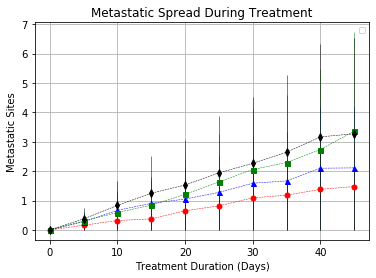

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(Metastatic_Sites_response_Mean.index, Metastatic_Sites_response_Mean["Capomulin"], yerr=Metastatic_Sites_response_StdERR["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Metastatic_Sites_response_Mean.index, Metastatic_Sites_response_Mean["Infubinol"], yerr=Metastatic_Sites_response_StdERR["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Metastatic_Sites_response_Mean.index, Metastatic_Sites_response_Mean["Ketapril"], yerr=Metastatic_Sites_response_StdERR["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Metastatic_Sites_response_Mean.index, Metastatic_Sites_response_Mean["Placebo"], yerr=Metastatic_Sites_response_StdERR["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Metastatic_Spread_During_Treatment")

# Show the Figure
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) 
Mice_Survival = mouse_id_merged_pd.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
Mice_count = Mice_Survival["Mouse ID"].count()
Mice_count_df = pd.DataFrame(Mice_count).reset_index()
# Preview DataFrame
Mice_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
SURVIVAL_Mice_count = Mice_count_df.pivot(index = 'Timepoint', columns ='Drug', values = 'Mouse ID') 
 
# Preview that Reformatting worked
SURVIVAL_Mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


No handles with labels found to put in legend.


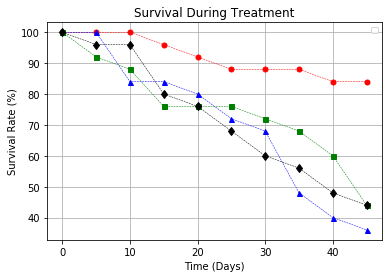

In [12]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * SURVIVAL_Mice_count["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * SURVIVAL_Mice_count["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * SURVIVAL_Mice_count["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * SURVIVAL_Mice_count["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Survival_During_Treatment")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (Tumor_response_Mean.iloc[-1] - Tumor_response_Mean.iloc[0]) / Tumor_response_Mean.iloc[0]
tumor_pct_change_sem =  100 * (Tumor_response_StdERR.iloc[-1] - Tumor_response_StdERR.iloc[0]) / Tumor_response_StdERR.iloc[0]
# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

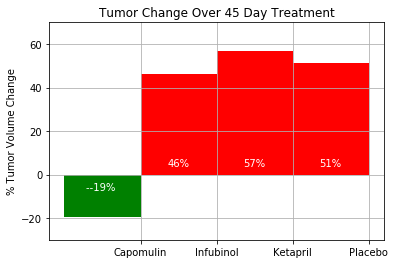

In [14]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"],
               tumor_pct_change["Infubinol"],
               tumor_pct_change["Ketapril"],
               tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc.
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Summary_Bar_Graph")

# Show the Figure
fig.show()